<a href="https://colab.research.google.com/github/fatisa2000/ML_HW2/blob/main/Question1_morecomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:

**Student ID**:

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [6]:
X, Y = None, None

### START CODE HERE ###
df=pd.read_csv('q1.csv')
print(df)
features=['X1','X2','X3','X4','X5','X6','X7','X8']
X=df[features]
features1=['Y1']
Y=df[features1]
print(X)
print(Y)
### END CODE HERE ###

print(X.shape)
print(Y.shape)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]
       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.

Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.
To overcome the model learning problem, we normalize the data. We make sure that the different features take on similar ranges of values so that gradient descents can converge more quickly

In [25]:
from pandas._libs.tslibs import normalize_i8_timestamps
### START CODE HERE ###
x_m=np.mean(X)
x_sigma=np.std(X)
xn1=np.linalg.norm(X)
yn1=np.linalg.norm(X)
xn2=X/xn1
yn2=Y/yn1
g=(Y-np.mean(Y))/np.std(Y)
l=(X-x_m)/x_sigma
print(l)
print(g)
### END CODE HERE ###

           X1        X2        X3        X4   X5        X6        X7        X8
0    2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.341641 -1.760447 -1.814575
1    2.041777 -1.785875 -0.561951 -1.470077  1.0 -0.447214 -1.760447 -1.814575
2    2.041777 -1.785875 -0.561951 -1.470077  1.0  0.447214 -1.760447 -1.814575
3    2.041777 -1.785875 -0.561951 -1.470077  1.0  1.341641 -1.760447 -1.814575
4    1.284979 -1.229239  0.000000 -1.198678  1.0 -1.341641 -1.760447 -1.814575
..        ...       ...       ...       ...  ...       ...       ...       ...
763 -1.174613  1.275625  0.561951  0.972512 -1.0  1.341641  1.244049  1.411336
764 -1.363812  1.553943  1.123903  0.972512 -1.0 -1.341641  1.244049  1.411336
765 -1.363812  1.553943  1.123903  0.972512 -1.0 -0.447214  1.244049  1.411336
766 -1.363812  1.553943  1.123903  0.972512 -1.0  0.447214  1.244049  1.411336
767 -1.363812  1.553943  1.123903  0.972512 -1.0  1.341641  1.244049  1.411336

[768 rows x 8 columns]
           Y1
0   -0.670116


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [8]:
### START CODE HERE ###
m=l.shape[0]
x1=np.c_[np.ones((m,1)),l]
### END CODE HERE ###

print(x1)

[[ 1.          2.04177671 -1.78587489 ... -1.34164079 -1.76044698
  -1.81457514]
 [ 1.          2.04177671 -1.78587489 ... -0.4472136  -1.76044698
  -1.81457514]
 [ 1.          2.04177671 -1.78587489 ...  0.4472136  -1.76044698
  -1.81457514]
 ...
 [ 1.         -1.36381225  1.55394308 ... -0.4472136   1.2440492
   1.41133622]
 [ 1.         -1.36381225  1.55394308 ...  0.4472136   1.2440492
   1.41133622]
 [ 1.         -1.36381225  1.55394308 ...  1.34164079  1.2440492
   1.41133622]]


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [9]:
def loss(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  loss = None
  ### START CODE HERE ###
  yy=np.dot(X,w)
  loss=np.sum(np.dot((yy-Y).T,(yy-Y)))/np.size(yy)
  ### END CODE HERE ###
  return loss



Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer:

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

the math of loss function :
linear eqution:z=Xw+b , 
prediction:y_hat=z , 
loss_function:0.5(y_hat-Y)^2
.We are interested in calculating the derivative of the loss with respect to 
z


In [10]:
def direct_method(X, Y):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  '''
  w = None
  m,n=X.shape
  Y=np.reshape(Y,(m,1))
  ### START CODE HERE ###
  w=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
  ### END CODE HERE ###
  return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [11]:
w = direct_method(l, g) # calculating w using direct method

print(f"loss for this problem using direct method is {loss(l, g, w)}")

loss for this problem using direct method is 0.09523825689116268


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**:

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [12]:
def gradient(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  grad = None
  ### START CODE HERE ###
  yy=np.dot(X,w)
  grad=2*X*(yy-Y)
  ### END CODE HERE ###
  return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [13]:
def gradient_descent(X, Y, alpha, num_iter):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  w = None
  loss_history=[]
  ### START CODE HERE ###
  w=np.random.rand(n)
  for i in range(num_iter):
    yy=np.dot(X,w)
    yy=np.reshape(yy,(m,1))
    i=np.reshape(((1/m)*0.01*(np.dot(l.T,(yy-g)))),(n))
    w=w-i
    loss=(1/2*m)*np.sum(np.square(yy-Y))
    loss_history.append(loss)

  ### END CODE HERE ###
  return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**:

Learning rate is used to scale the magnitude of parameter updates during gradient descent. The choice of the value for learning rate can impact two things: 1) how fast the algorithm learns and 2) whether the cost function is minimized or not.It can be seen that for an optimal value of the learning rate, the cost function value is minimized in a few iterations (smaller time).
If the learning rate used is lower than the optimal value, the number of iterations/epochs required to minimize the cost function is high (takes longer time).If the learning rate is high, the cost function could saturate at a value higher than the minimum value. If the learning rate selected is very high, the cost function could continue to increase with iterations/epochs. An optimal learning rate is not easy to find for a given problem.

Text(0, 0.5, '$\\alpha$')

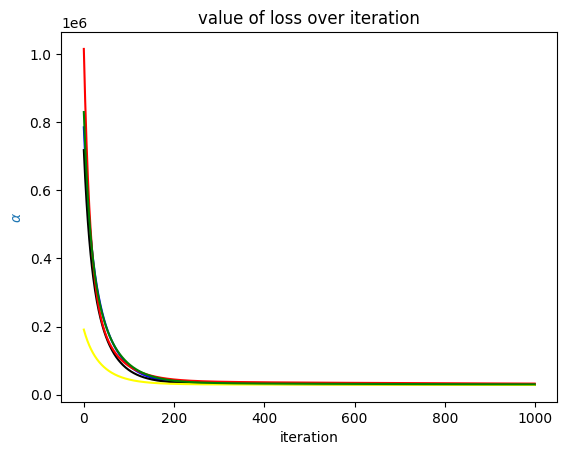

In [16]:
### START CODE HERE ###
j1,k1=gradient_descent(l,g,0.001,1000)
j2,k2=gradient_descent(l,g,0.005,1000)
j3,k3=gradient_descent(l,g,0.01,1000)
j4,k4=gradient_descent(l,g,0.1,1000)
j5,k5=gradient_descent(l,g,1,1000)
color='tab:blue'
fig,ax1=plt.subplots()
ax1.plot(k1,label='$\\alpha_{0.001}$',linestyle='-',color='blue')
ax1.plot(k2,label='$\\alpha_{0.001}$',linestyle='-',color='black')
ax1.plot(k3,label='$\\alpha_{0.001}$',linestyle='-',color='yellow')
ax1.plot(k4,label='$\\alpha_{0.001}$',linestyle='-',color='red')
ax1.plot(k5,label='$\\alpha_{0.001}$',linestyle='-',color='green')
ax1.set_title('value of loss over iteration')
ax1.set_xlabel('iteration')
ax1.set_ylabel('$\\alpha$',color=color)
### END CODE HERE ###

i think alpha=0.01 is the best value for this problem.

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**:

The main reason why gradient descent is used for linear regression is the computational complexity: it's computationally cheaper (faster) to find the solution using the gradient descent in some cases.
The direct method looks very simple,even computationally,because it only works for univariate case, i.e. when we have only one variable. In the multivariate case, when we have many variables,the formula is slightly more complicated on paper and requires much more calculations.
the gradient descent allows to save a lot of time on calculations. Moreover, the way it's done allows for a trivial parallelization, i.e. distributing the calculations across multiple processors or machines. The linear algebra solution can also be parallelized but it's more complicated and still expensive.Additionally, there are versions of gradient descent when we keep only a piece of our data in memory, lowering the requirements for computer memory. Overall, for extra large problems it's more efficient than linear algebra solution.

This becomes even more important as the dimensionality increases, when you have thousands of variables like in machine learning.
One other reason is that gradient descent is more of a general method. For many machine learning problems, the cost function is not convex (e.g., matrix factorization, neural networks) so we cannot use a closed form solution. In those cases, gradient descent is used to find some good local optimum points.

## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

In [26]:
def stochastic_gradient_descent(X, Y, k, alpha, num_iter):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  k: number of data points used in each iteration
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  w = None
  loss_history=[]
  ### START CODE HERE ###
  w=np.ones(n)

  for i in range(num_iter):
    batch=np.random.randint(m)
    x_batch=X[batch,:]
    y_batch=Y[batch,:]
    prediction=np.dot(x_batch,w.T)
    loss_history.append((1/2*m)*np.sum(np.square(prediction-y_batch)))
    gradient=x_batch.T.dot(prediction-y_batch)
    update=-alpha*gradient
    w=w+update
  ### END CODE HERE ###
  return w, loss_history


